In [24]:
%pip install nltk
%pip install emoji
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install Counter
%pip install wordcloud


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
import ast 
import nltk 
import emoji
from wordcloud import WordCloud



In [4]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Segoe UI Emoji', 'Apple Color Emoji', 'Noto Color Emoji', 'Symbola']

# Asegurarnos de que los caracteres Unicode (como emojis) se rendericen correctamente
plt.rcParams['axes.unicode_minus'] = False

# Configuration

In [5]:
ruta_base = os.path.dirname(os.getcwd())
input_folder = 'data_processed' 
input_filename = 'fifa_tweets_clean_for_EDA.csv' 
input_csv_file = os.path.join(ruta_base,input_folder, input_filename)

# Load stopwords if necessary (to calculate token length)

In [6]:
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except (nltk.downloader.DownloadError, LookupError):
    print("Recursos de NLTK ('punkt', 'stopwords') no encontrados. Descargando...")
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)

# Start functions and data loading

In [7]:
import pandas as pd
import emoji
import ast
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assuming input_csv_file and input_folder are defined elsewhere, e.g.:
# input_folder = 'path/to/your/data'
# input_csv_file = f'{input_folder}/processed_tweets.csv'


def get_emoji_descriptions(tweet):
    """Converts emojis into descriptive text (e.g., ❤️ -> red heart)."""
    if pd.isna(tweet):
        return []
    tweet_str = str(tweet)
    emoji_list_found = emoji.emoji_list(tweet_str)
    descriptions = []
    for emo in emoji_list_found:
        # Demojize with no delimiters and convert to lowercase
        description = emoji.demojize(emo['emoji'], delimiters=("", "")).lower()
        descriptions.append(description)
    return descriptions


# --- Load the processed dataset ---
print(f"Loading processed dataset from '{input_csv_file}' for EDA...")
try:
    # When reading a CSV, columns that were lists need to be converted.
    # *** NOW INCLUDES THE 'emojis' COLUMN IN THE CONVERTER ***
    df = pd.read_csv(
        input_csv_file,
        encoding='utf-8',
        converters={
            # Assuming 'hastag' was the column name from previous step
            'hastag': lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip().startswith('[') else [],
            'emoji_chars': lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip().startswith('[') else [],
            # *** ADDING 'emojis' TO THE CONVERTER ***
            'emojis': lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip().startswith('[') else [],
            'processed_tokens': lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip().startswith('[') else []
        }
    )

    print("Processed dataset loaded successfully.")
    print(f"Number of rows loaded: {len(df)}")
    print("-" * 30)

except FileNotFoundError:
    print(f"Error: The processed file '{input_csv_file}' was not found.")
    print(f"Ensure the preprocessing script ran correctly and generated this file in the '{input_folder}' folder.")
    sys.exit(1)
except Exception as e:
    print(f"Error loading the processed file: {e}")
    print("Ensure the file is not corrupted and that list columns are properly formatted.")
    sys.exit(1)

# Collect all emoji descriptions for analysis
all_emoji_descriptions = []
# Assuming 'Tweet' is the original tweet text column
for tweet in df['Tweet'].astype(str):
    all_emoji_descriptions.extend(get_emoji_descriptions(tweet))


# --- Basic checks and dataset information ---
print("Basic dataset information:")
df.info()
print("-" * 30)

print("\nFirst 5 rows of the dataset:")
print(df.head())
print("-" * 30)

print("\nDescriptive statistics for numerical columns:")
print(df.describe())
print("-" * 30)


Loading processed dataset from 'c:\Users\oscar\Documents\Semestre6\discretas\ti2-2025-1-lora_team\data_processed\fifa_tweets_clean_for_EDA.csv' for EDA...
Processed dataset loaded successfully.
Number of rows loaded: 22524
------------------------------
Basic dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Number of Likes   22524 non-null  int64 
 1   Tweet             22524 non-null  object
 2   Sentiment         22524 non-null  object
 3   test_clean        22524 non-null  object
 4   processed_tokens  22524 non-null  object
 5   hastag            22524 non-null  object
 6   emoji_chars       22524 non-null  object
 7   sentiment_label   22524 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.4+ MB
------------------------------

First 5 rows of the dataset:
   Number of Likes                      

# --- Starting Exploratory Data Analysis (EDA) ---



--- Starting Exploratory Data Analysis (EDA) ---

Sentiment Distribution (Categorical):
Sentiment
positive    8489
neutral     8251
negative    5784
Name: count, dtype: int64


C:\Users\oscar\AppData\Local\Temp\ipykernel_36284\2028155268.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Sentiment', order=sentiment_counts.index, palette='viridis')


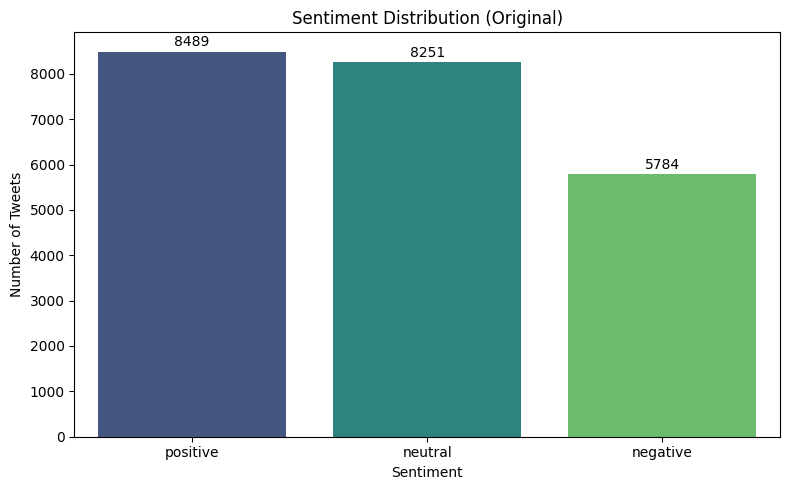


Sentiment Distribution (Numerical Label):
sentiment_label
0    5784
1    8251
2    8489
Name: count, dtype: int64


C:\Users\oscar\AppData\Local\Temp\ipykernel_36284\2028155268.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='sentiment_label', order=sentiment_label_counts.index, palette='viridis')


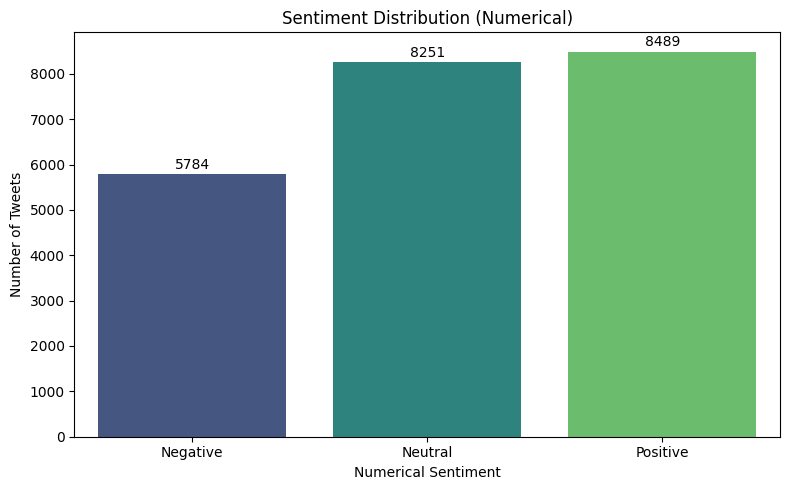

In [10]:

print("\n--- Starting Exploratory Data Analysis (EDA) ---")

# 1. Sentiment Distribution (Original and Numerical)
print("\nSentiment Distribution (Categorical):")
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Sentiment', order=sentiment_counts.index, palette='viridis')
plt.title('Sentiment Distribution (Original)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

# Añadir conteo sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.tight_layout()
plt.show()

print("\nSentiment Distribution (Numerical Label):")
sentiment_label_counts = df['sentiment_label'].value_counts(dropna=False).sort_index(na_position='last')
print(sentiment_label_counts)

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='sentiment_label', order=sentiment_label_counts.index, palette='viridis')
plt.title('Sentiment Distribution (Numerical)')

# Etiquetas personalizadas en el eje x
sentiment_labels_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
x_labels = [sentiment_labels_map.get(label, 'NaN') for label in sentiment_label_counts.index]
plt.xticks(ticks=range(len(x_labels)), labels=x_labels)
plt.xlabel('Numerical Sentiment')
plt.ylabel('Number of Tweets')

# Añadir conteo sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.tight_layout()
plt.show()


# 2. Analysis of Number of Likes



Analysis of Number of Likes:
count     22524.000000
mean         23.822856
std        2128.018705
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max      316867.000000
Name: Number of Likes, dtype: float64


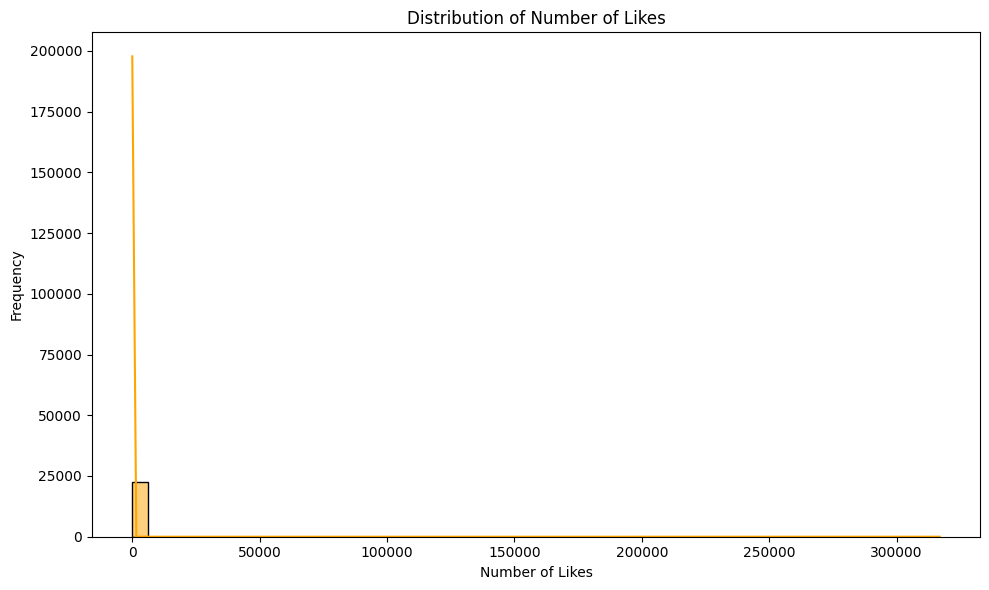

In [11]:

print("\nAnalysis of Number of Likes:")
# Assuming 'Number of Likes' is the likes count column
print(df['Number of Likes'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of Likes'], bins=50, kde=True, color='orange')
plt.title('Distribution of Number of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



# 5. Text Length and Token Analysis



Analysis of Text Length and Number of Tokens:


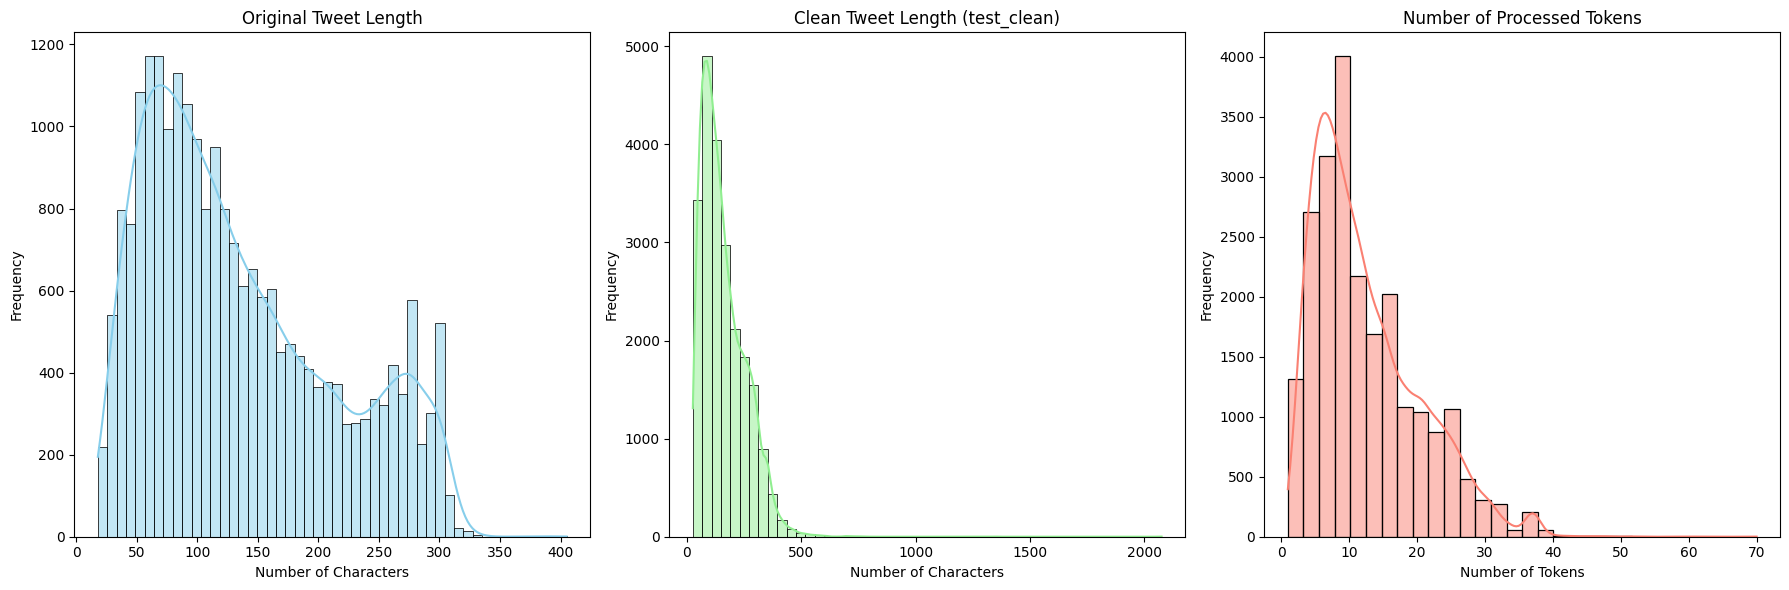


Average Length (processed tokens) by Sentiment:
Sentiment
negative    12.191563
neutral     12.670101
positive    12.689598
Name: num_processed_tokens, dtype: float64


In [12]:
print("\nAnalysis of Text Length and Number of Tokens:")
# Recalculate if they don't exist (they should if the preprocessor was used)
# Assuming 'Tweet' is the original text and 'test_clean' is a cleaned version
df['original_tweet_length'] = df['Tweet'].astype(str).apply(len)
df['clean_tweet_length'] = df['test_clean'].astype(str).apply(len)
# Ensure 'processed_tokens' is a list before .apply(len)
df['num_processed_tokens'] = df['processed_tokens'].apply(lambda x: len(x) if isinstance(x, list) else 0)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(df['original_tweet_length'].dropna(), bins=50, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Original Tweet Length')
axes[0].set_xlabel('Number of Characters')
axes[0].set_ylabel('Frequency')

sns.histplot(df['clean_tweet_length'].dropna(), bins=50, kde=True, color='lightgreen', ax=axes[1])
axes[1].set_title('Clean Tweet Length (test_clean)')
axes[1].set_xlabel('Number of Characters')
axes[1].set_ylabel('Frequency')

sns.histplot(df['num_processed_tokens'].dropna(), bins=30, kde=True, color='salmon', ax=axes[2])
axes[2].set_title('Number of Processed Tokens')
axes[2].set_xlabel('Number of Tokens')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\nAverage Length (processed tokens) by Sentiment:")
print(df.groupby('Sentiment')['num_processed_tokens'].mean())


# 6. Most Common Words (from processed_tokens)



Most Common Words (from processed_tokens):


C:\Users\oscar\AppData\Local\Temp\ipykernel_36284\3236782331.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(counts), y=list(words), palette='viridis')


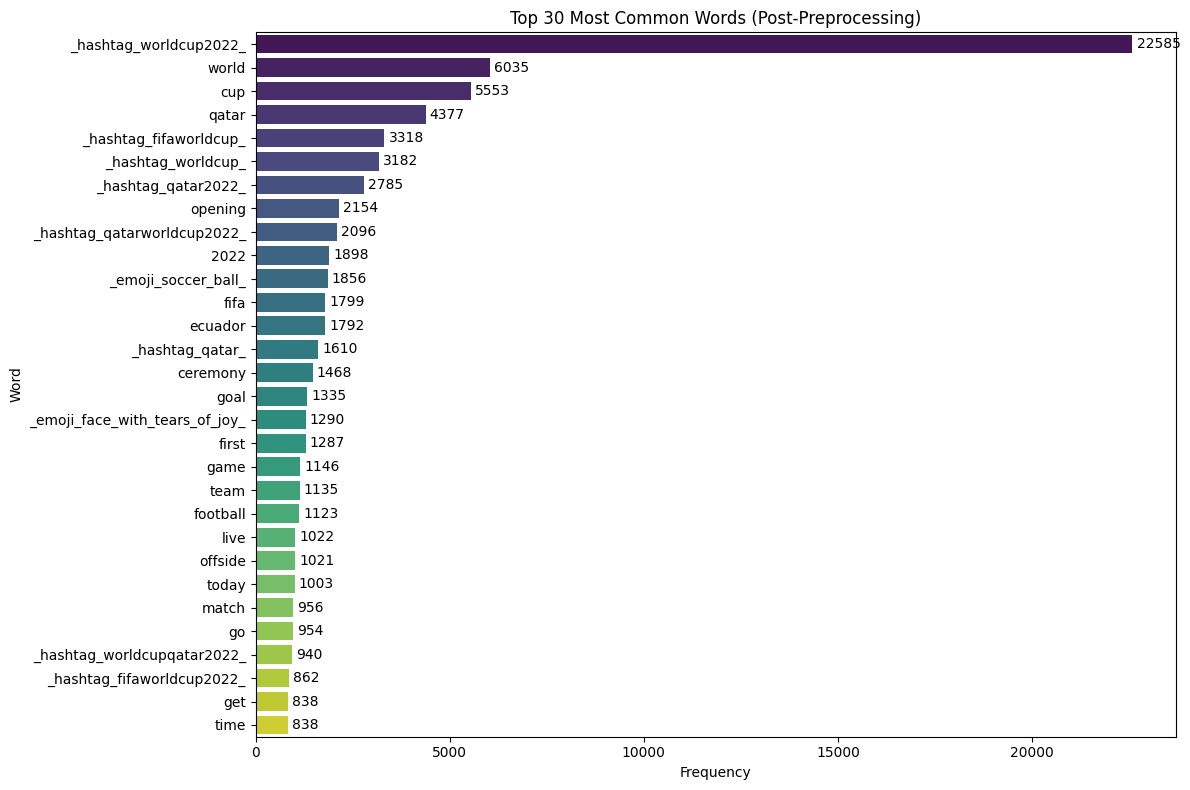

In [ ]:
print("\nMost Common Words (from processed_tokens):")

# Aplanar lista de tokens
all_processed_words = [
    word for tokens_list in df['processed_tokens']
    if isinstance(tokens_list, list)
    for word in tokens_list
]

if all_processed_words:
    word_counts = Counter(all_processed_words)
    N = 30
    common_words = word_counts.most_common(N)

    if common_words:
        words, counts = zip(*common_words)

        plt.figure(figsize=(12, 8))
        ax = sns.barplot(x=list(counts), y=list(words), palette='viridis')

        plt.title(f'Top {N} Most Common Words (Post-Preprocessing)')
        plt.xlabel('Frequency')
        plt.ylabel('Word')

        # Añadir valores de frecuencia sobre las barras
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', padding=3)

        plt.tight_layout()
        plt.show()
    else:
        print("No common words found to display.")
else:
    print("No processed tokens available for common word analysis.")


# 7. Most Common Hashtags (from hastag)



Most Common Hashtags:


C:\Users\oscar\AppData\Local\Temp\ipykernel_36284\2800877582.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(ht_counts), y=list(hashtags), palette='viridis')


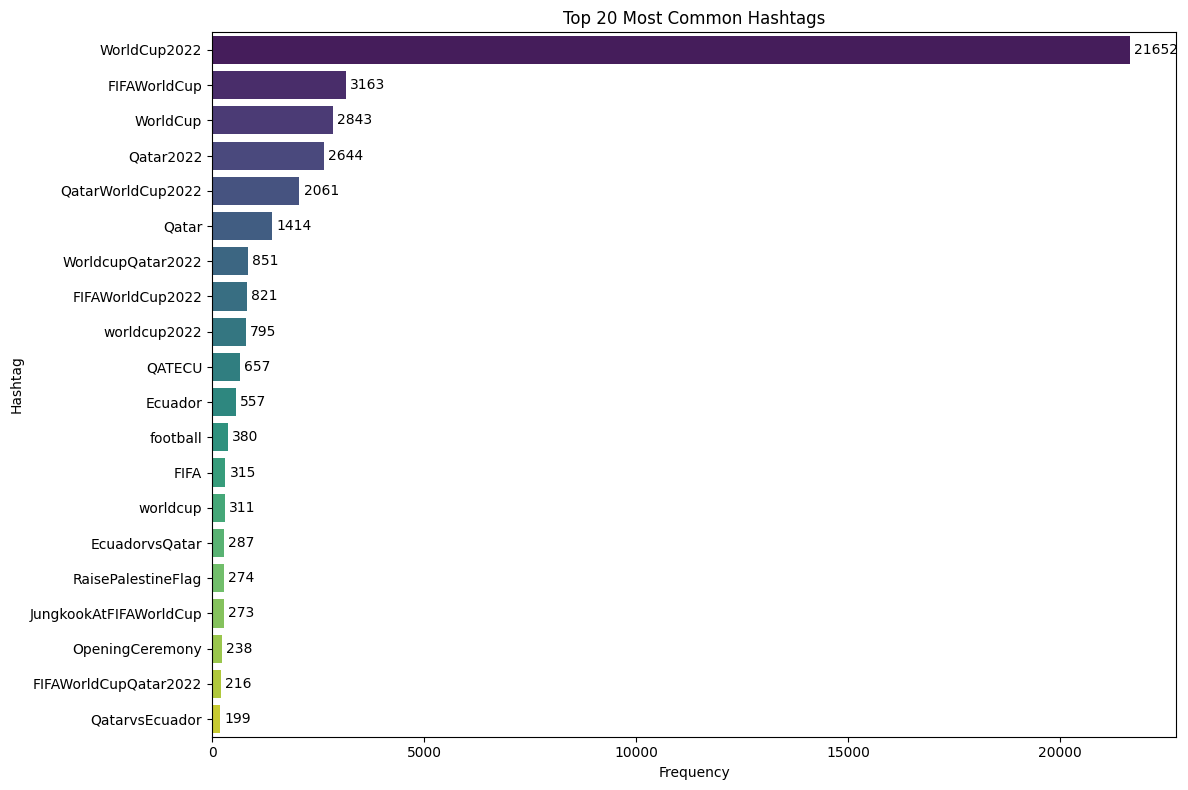

In [18]:
print("\nMost Common Hashtags:")

# Aplanar lista de hashtags
all_hashtags = [
    ht for ht_list in df['hastag']
    if isinstance(ht_list, list)
    for ht in ht_list
]

if all_hashtags:
    hashtag_counts = Counter(all_hashtags)
    N_hashtags = 20
    common_hashtags = hashtag_counts.most_common(N_hashtags)

    if common_hashtags:
        hashtags, ht_counts = zip(*common_hashtags)

        plt.figure(figsize=(12, 8))
        ax = sns.barplot(x=list(ht_counts), y=list(hashtags), palette='viridis')

        plt.title(f'Top {N_hashtags} Most Common Hashtags')
        plt.xlabel('Frequency')
        plt.ylabel('Hashtag')

        # Mostrar etiquetas con frecuencia sobre cada barra
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', padding=3)

        plt.tight_layout()
        plt.show()
    else:
        print("No common hashtags found to display.")
else:
    print("No hashtags found in the dataset.")


# Count the most common emojis


C:\Users\oscar\AppData\Local\Temp\ipykernel_36284\203212757.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(counts), y=list(labels), palette='viridis')


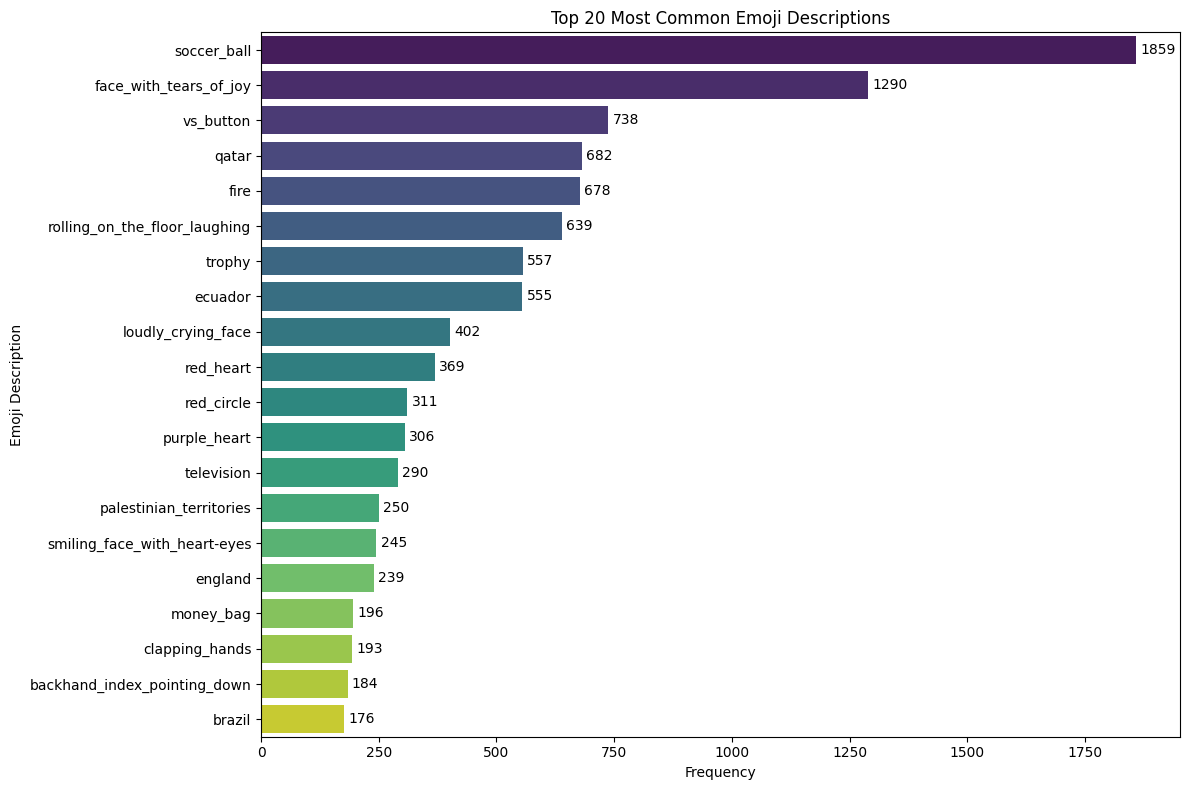

In [20]:
if all_emoji_descriptions:
    emoji_desc_counts = Counter(all_emoji_descriptions)
    N = 20
    common_desc = emoji_desc_counts.most_common(N)

    if common_desc:
        labels, counts = zip(*common_desc)

        plt.figure(figsize=(12, 8))
        ax = sns.barplot(x=list(counts), y=list(labels), palette='viridis')

        plt.title(f'Top {N} Most Common Emoji Descriptions')
        plt.xlabel('Frequency')
        plt.ylabel('Emoji Description')

        # Mostrar etiquetas con conteo sobre cada barra
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', padding=3)

        plt.tight_layout()
        plt.show()
    else:
        print("No common emoji descriptions found to display.")
else:
    print("No emoji descriptions found to plot.")


#  Relationship between Number of Likes and Sentiment



Relationship between Number of Likes and Sentiment:


C:\Users\oscar\AppData\Local\Temp\ipykernel_36284\2415939219.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='Number of Likes', order=sentiment_counts.index, palette='viridis')


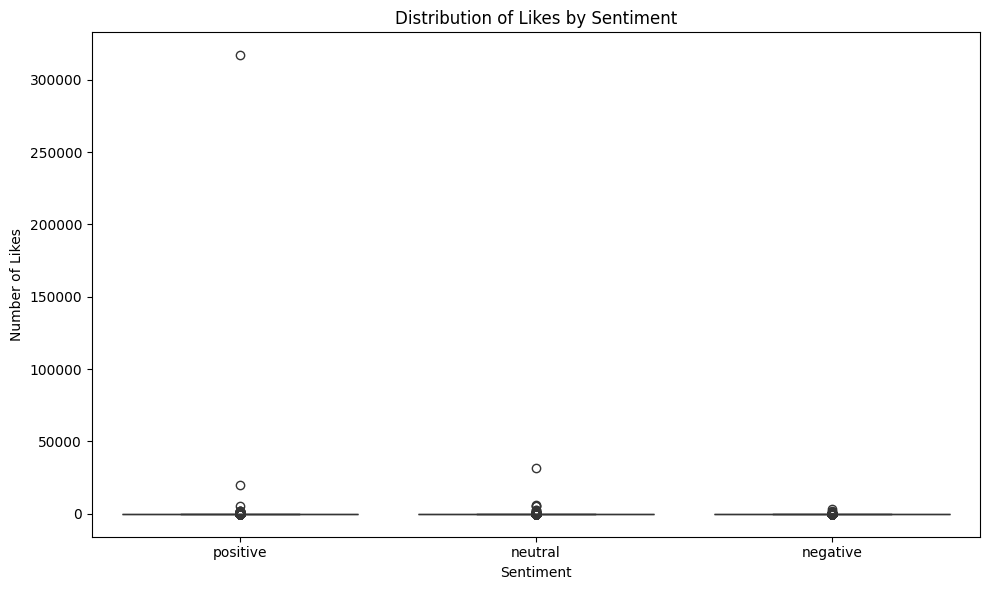

In [22]:
print("\nRelationship between Number of Likes and Sentiment:")
# Use the original 'Sentiment' column for the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sentiment', y='Number of Likes', order=sentiment_counts.index, palette='viridis')
plt.title('Distribution of Likes by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Likes')
# plt.ylim(0, 500) # Uncomment and adjust if there are extreme outliers
plt.tight_layout()
plt.show()

# Processed token length vs Sentiment


C:\Users\oscar\AppData\Local\Temp\ipykernel_36284\2169417239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='num_processed_tokens', order=sentiment_counts.index, palette='viridis')


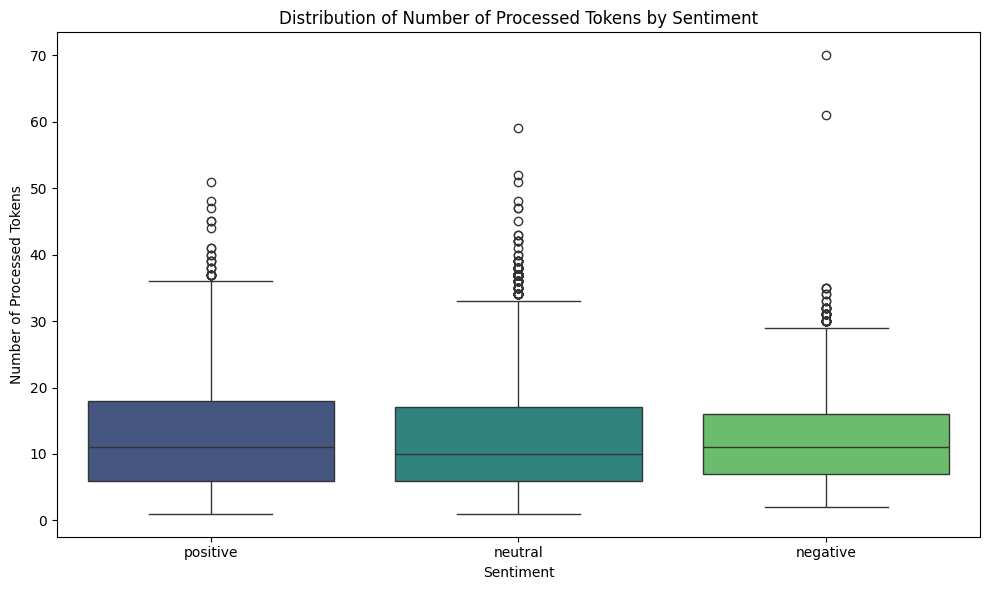

In [23]:


plt.figure(figsize=(10, 6))
# Use the original 'Sentiment' column for the boxplot
sns.boxplot(data=df, x='Sentiment', y='num_processed_tokens', order=sentiment_counts.index, palette='viridis')
plt.title('Distribution of Number of Processed Tokens by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Processed Tokens')
plt.tight_layout()
plt.show()


#  Word Clouds by Sentimiento 


Word Clouds por Sentimiento:


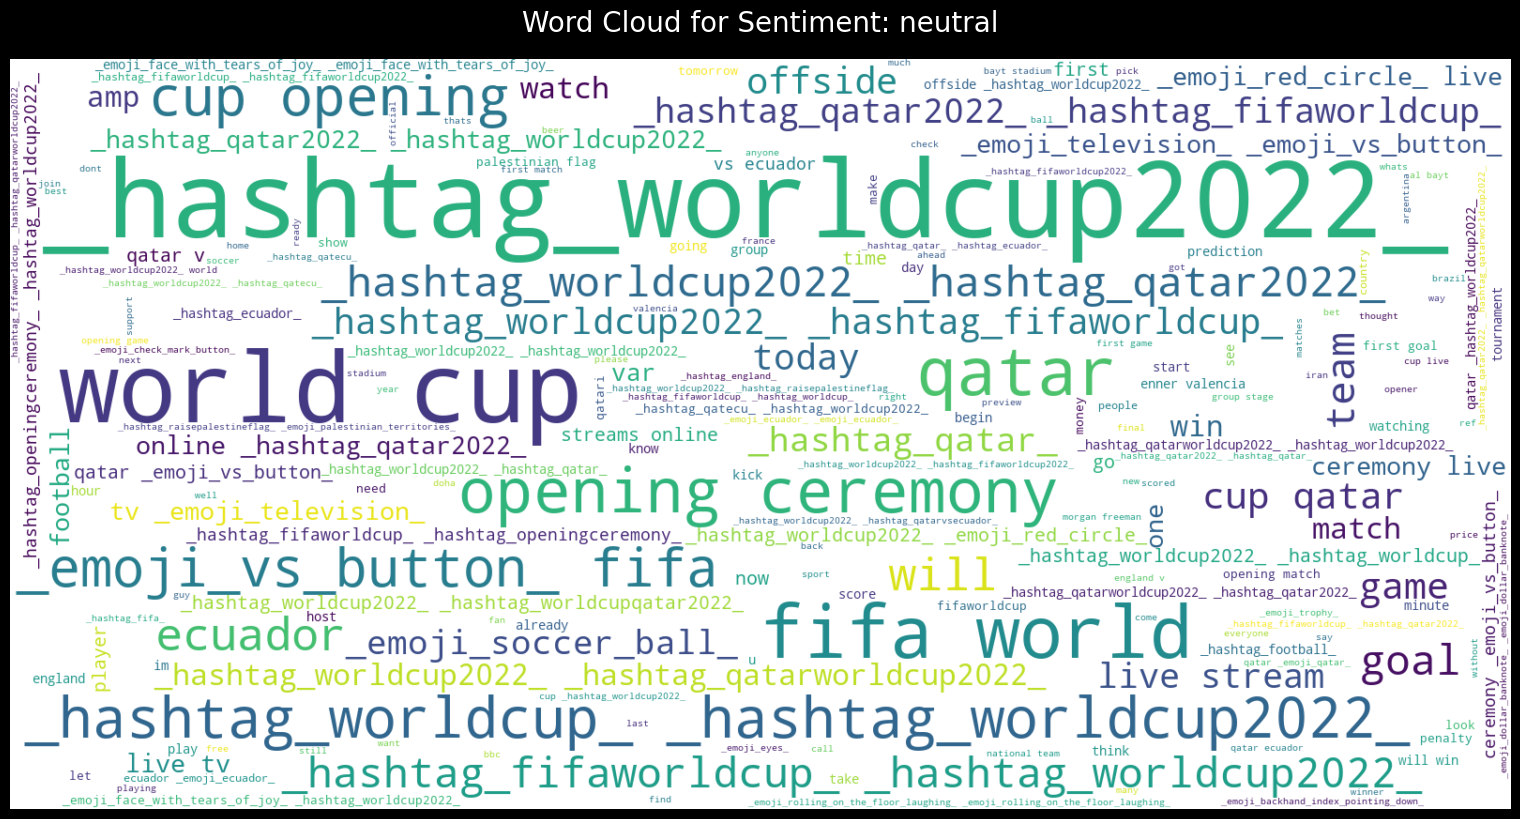

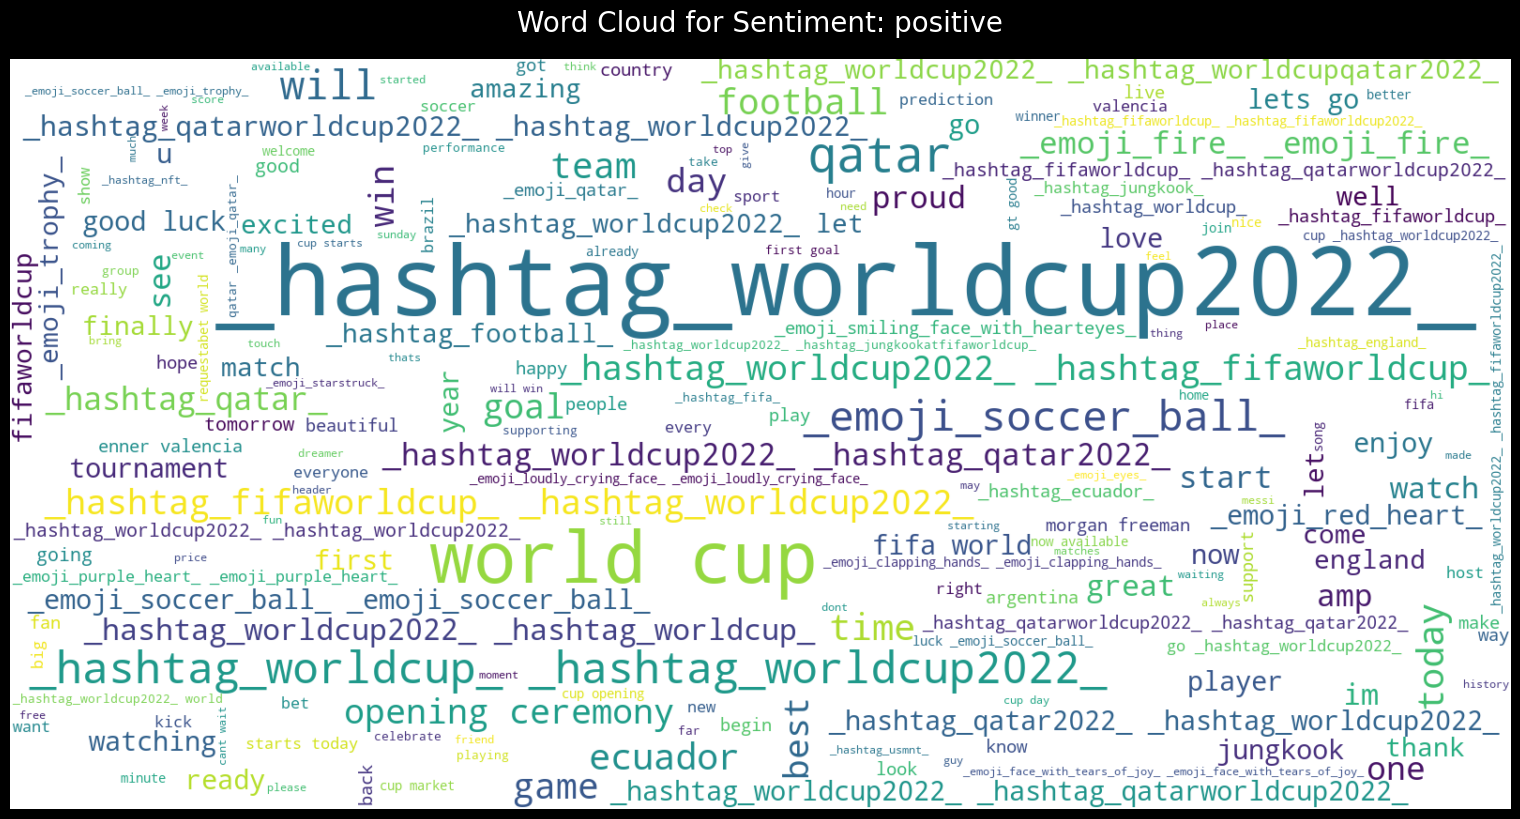

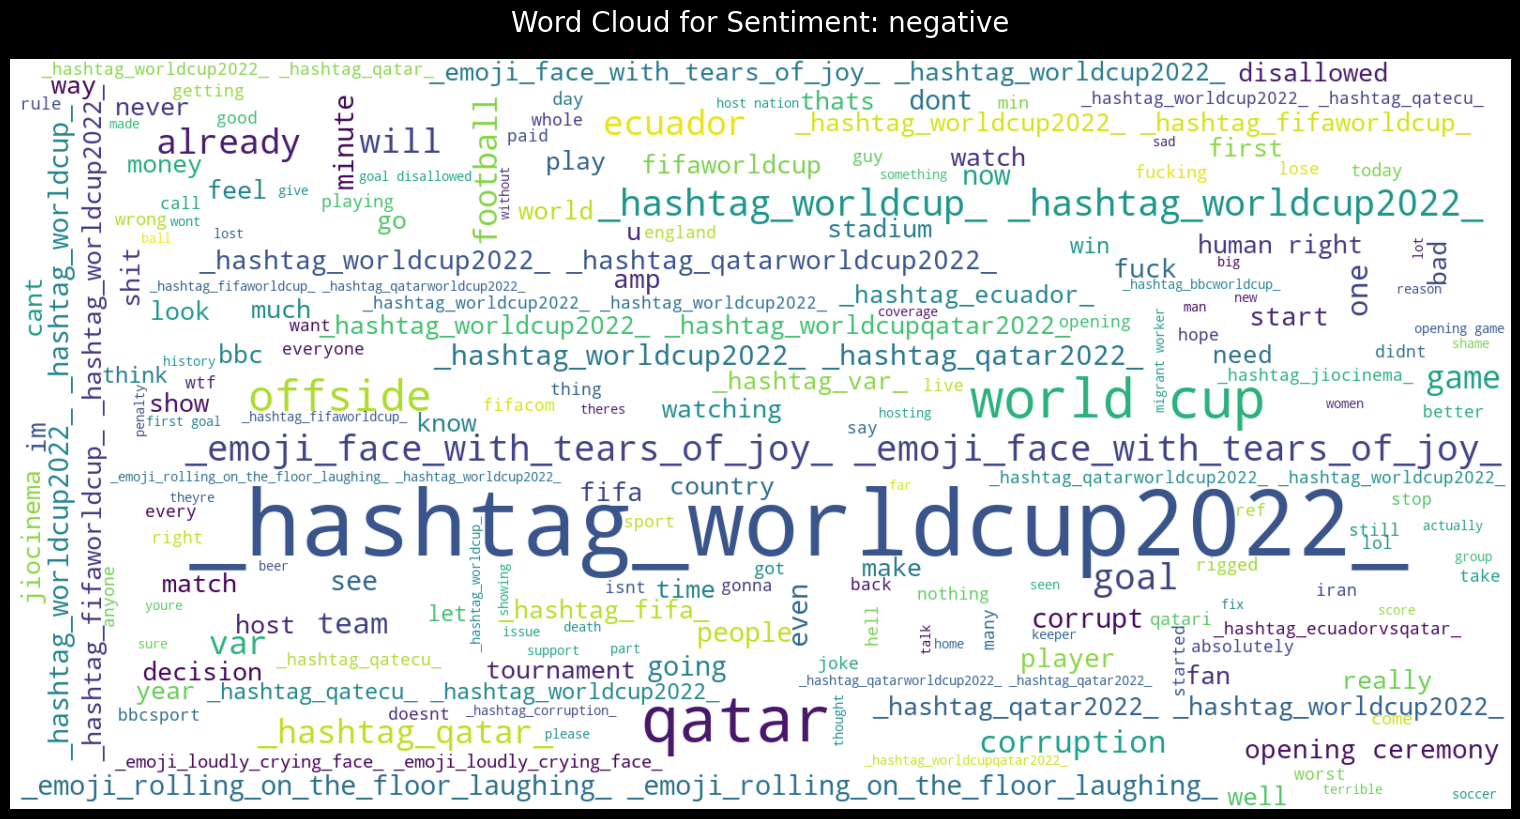

In [26]:
from wordcloud import WordCloud

# --- Word Clouds por Sentimiento ---
print("\nWord Clouds por Sentimiento:")

if 'test_clean' in df.columns and 'Sentiment' in df.columns:

    sentiment_categories = df['Sentiment'].unique()

    for sentiment in sentiment_categories:
        subset = df[df['Sentiment'] == sentiment]

        combined_text = ' '.join(subset['test_clean'].dropna().astype(str).tolist())

        if combined_text.strip(): 
            wordcloud = WordCloud(
                background_color="white",
                width=1600,
                height=800,
                colormap='viridis' 
            ).generate(combined_text)

            plt.figure(figsize=(16, 8), facecolor="k")
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis("off")
            plt.title(f'Word Cloud for Sentiment: {sentiment}', fontsize=20, color='white', pad=20)
            plt.tight_layout(pad=0)
            plt.show()
        else:
            print(f"No hay texto válido para el sentimiento: {sentiment}")
else:
    print("Columnas necesarias 'test_clean' o 'Sentiment' no encontradas en el DataFrame.")
